In [7]:
import os
from utils import *
import pandas as pd
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'vscode'
os.chdir(path=os.getcwd().rstrip('\\code'))

# Get data

In [8]:
ipo = pd.read_pickle(filepath_or_buffer='data/ipo_preprocessed.pkl')
ipo

,company_name,is_offering_new_shares,is_offering_existing_shares,is_moving,is_privatized,is_foreign,retail_reduction_rate,sector,market_volatility,market_return,air,target,date_gap,reference_rate,year,log_value,log_price,const,target_lag1
listing_date,,,,,,,,,,,,,,,,,,,
2005-01-14,COMP,1,0,0,0,0,0.00,information_technology,0.75,-2.87,14.69,1,12,6.50,2005,16.851064,3.624341,1,1.0
2005-01-27,ZELMER,0,1,0,0,0,98.70,heavy_industry,0.75,1.20,32.19,1,8,6.50,2005,18.945634,2.580217,1,1.0
2005-02-04,EUROCASH,0,1,0,0,0,43.80,retail_and_consumer_industry,0.68,1.12,3.87,1,5,6.50,2005,18.998418,1.131402,1,1.0
2005-02-10,CIECH,1,1,0,1,0,95.63,raw_materials,0.75,4.01,16.10,1,11,6.50,2005,19.440672,3.178054,1,1.0
2005-02-11,GRAAL,1,0,0,0,0,0.00,retail_and_consumer_industry,0.75,4.21,-5.93,0,11,6.50,2005,16.901820,2.708050,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-07,BIG CHEESE STUDIO,1,1,0,0,0,68.68,information_technology,1.08,-7.80,-2.20,0,21,1.25,2021,17.144289,3.555348,1,0.0
2021-12-09,GRUPA PRACUJ,0,1,0,0,0,87.67,information_technology,1.17,-0.57,-5.03,0,12,1.75,2021,20.836538,4.304065,1,0.0
2021-12-10,STS HOLDING,0,1,0,0,0,87.20,media,1.16,-0.78,2.64,1,12,1.75,2021,20.798489,3.135494,1,0.0


# Perform exploratory data analysis

### Endogeous variable

#### Continuous

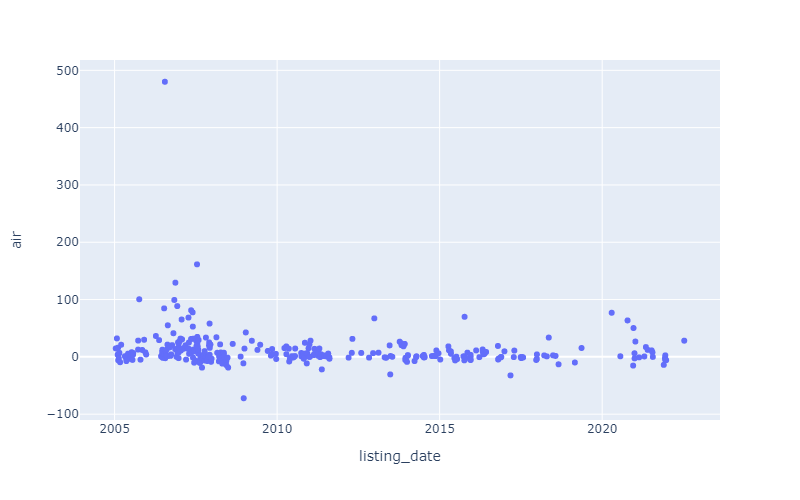

In [9]:
fig = px.scatter(data_frame=ipo.reset_index(), y='air', x='listing_date', width=800, height=500)
fig.show(renderer='png')

In [10]:
# Outlier, but it's legit - it really happened in the past
# Source: https://biznes.interia.pl/gieldy/aktualnosci/news-gielda-rekordowy-debiut-na-parkiecie,nId,3538141
ipo[ipo['air'] > 400]

,company_name,is_offering_new_shares,is_offering_existing_shares,is_moving,is_privatized,is_foreign,retail_reduction_rate,sector,market_volatility,market_return,air,target,date_gap,reference_rate,year,log_value,log_price,const,target_lag1
listing_date,,,,,,,,,,,,,,,,,,,
2006-07-20,INWEST CONSULTING,1,1,0,0,0,95.0,finance,1.62,11.31,480.07,1,19,4.0,2006,15.50745,1.321756,1,1.0


In [11]:
# Outlier, but it's legit - it really happened in the past
# Source: https://finanse.wp.pl/kurs-izns-ilawa-traci-w-debiucie-na-gpw-ponad-60-proc-opis-6116763748710529a
ipo[ipo['air'] < -50]

,company_name,is_offering_new_shares,is_offering_existing_shares,is_moving,is_privatized,is_foreign,retail_reduction_rate,sector,market_volatility,market_return,air,target,date_gap,reference_rate,year,log_value,log_price,const,target_lag1
listing_date,,,,,,,,,,,,,,,,,,,
2008-12-22,IZNS IŁAWA,1,0,0,0,0,0.0,heavy_industry,2.28,5.6,-72.2,0,25,5.75,2008,11.814148,0.993252,1,0.0


In [12]:
perform_stationarity_test(df=ipo, col_name='air')

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root (series is not stationary).
The alternative hypothesis is that there is no unit root.
p-value = P(reject H0|H0 true)
p-value for air is equal to 0.236.
p-value > 0.05, hence there is not enough evidence to reject H0 -> the process is not stationary!

The null hypothesis of the Kwiatkowski-Phillips-Schmidt-Shin is that the process is trend stationary.
The alternative hypothesis is that there is a unit root (series is not stationary).
p-value = P(reject H0|H0 true)
p-value for air is equal to 0.01.
p-value < 0.05, hence there is enough evidence to reject H0 -> the process is not stationary!


In [13]:
# Bonus test - remove one outlier and check stationarity
perform_stationarity_test(df=ipo[ipo['air'] < 400], col_name='air')

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root (series is not stationary).
The alternative hypothesis is that there is no unit root.
p-value = P(reject H0|H0 true)
p-value for air is equal to 0.088.
p-value > 0.05, hence there is not enough evidence to reject H0 -> the process is not stationary!

The null hypothesis of the Kwiatkowski-Phillips-Schmidt-Shin is that the process is trend stationary.
The alternative hypothesis is that there is a unit root (series is not stationary).
p-value = P(reject H0|H0 true)
p-value for air is equal to 0.01.
p-value < 0.05, hence there is enough evidence to reject H0 -> the process is not stationary!


In [14]:
perform_autocorrelation_test(series=ipo['air'], order=10)

The null hypothesis of Ljung-Box test is that the autocorrelations of any order up to 10 are all zero.
p-value = P(reject H0|H0 true)
p-values of Ljung-Box test are: [0.015, 0.015, 0.037, 0.054, 0.096, 0.126, 0.104, 0.118, 0.164, 0.18]
p-values > 0.05, hence there is not enough evidence to reject H0 -> the series is uncorrelated at lags [4, 5, 6, 7, 8, 9, 10]
p-values < 0.05, hence there is enough evidence to reject H0 -> the series is autocorrelated at lags [1, 2, 3]


In [15]:
perform_normality_test(df=ipo, col_name='air')

The null hypothesis of both Jarque-Bera and Shapiro-Wilk tests is that the sample was drawn from a normal distribution.
p-value = P(reject H0|H0 true)
p-value of Jarque-Bera test is equal to: 0.0
p-value of Shapiro-Wilk test is equal to: 0.0
both Jarque-Bera and Shapiro-Wilk p-values < 0.05, hence hence there is enough evidence to reject H0 -> the sample does not follow a normal distribution!


#### Categorical

In [16]:
# Dependent variable is fairly unbalanced. 
# This is indicative of bias - most initial public offers on the Warsaw Stock Exchange are underpriced.
np.round(len(ipo[ipo['target'] == 1]) / len(ipo), 2)

0.69

In [17]:
perform_autocorrelation_test(series=ipo['target'], order=10)

The null hypothesis of Ljung-Box test is that the autocorrelations of any order up to 10 are all zero.
p-value = P(reject H0|H0 true)
p-values of Ljung-Box test are: [0.002, 0.001, 0.002, 0.005, 0.008, 0.014, 0.026, 0.039, 0.06, 0.02]
p-values > 0.05, hence there is not enough evidence to reject H0 -> the series is uncorrelated at lags [9]
p-values < 0.05, hence there is enough evidence to reject H0 -> the series is autocorrelated at lags [1, 2, 3, 4, 5, 6, 7, 8, 10]


### Bivariate relationships

#### Continuous exogenous variables

Firstly, take a look at boxplots to see if there is a bivariate relationship between endogenous and exogenous variable.

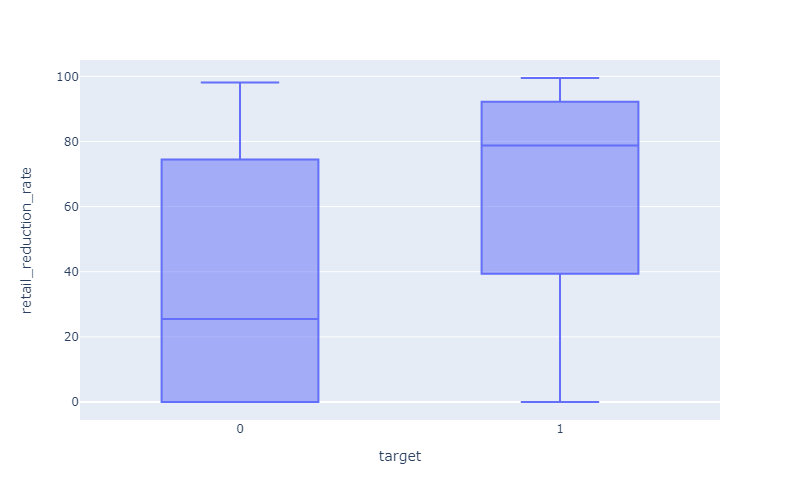

In [18]:
fig = px.box(data_frame=ipo, x='target', y='retail_reduction_rate', width=800, height=500)
fig.show(renderer='png')

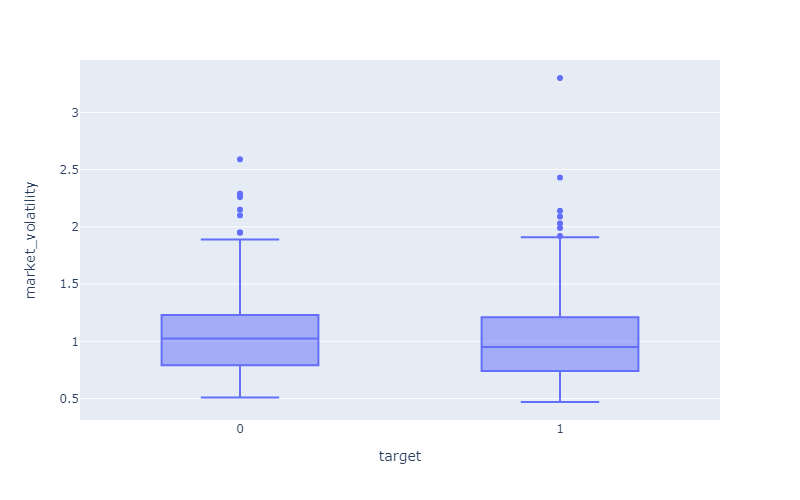

In [19]:
fig = px.box(data_frame=ipo, x='target', y='market_volatility', width=800, height=500)
fig.show(renderer='png')

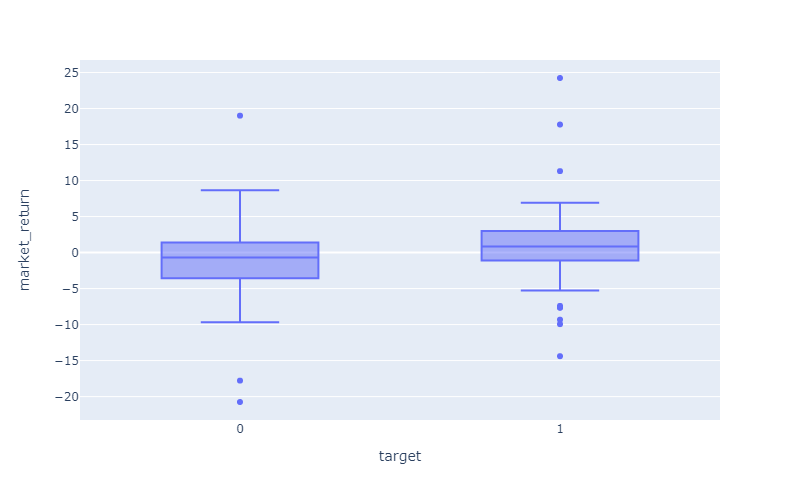

In [20]:
fig = px.box(data_frame=ipo, x='target', y='market_return', width=800, height=500)
fig.show(renderer='png')

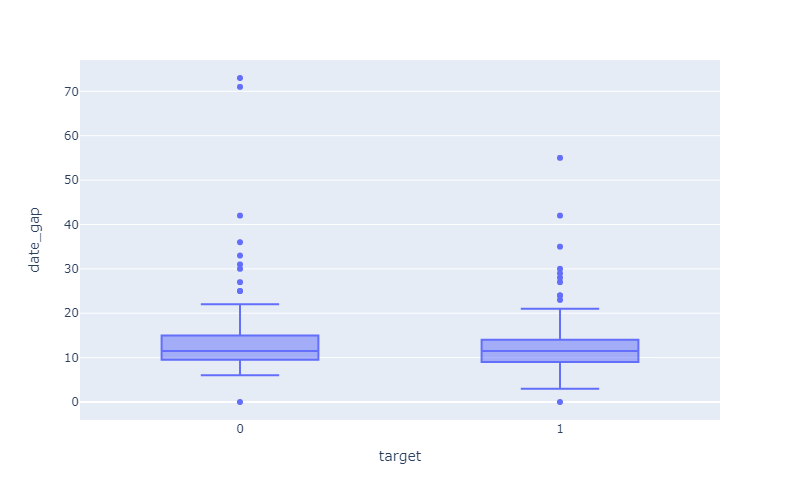

In [21]:
fig = px.box(data_frame=ipo, x='target', y='date_gap', width=800, height=500)
fig.show(renderer='png')

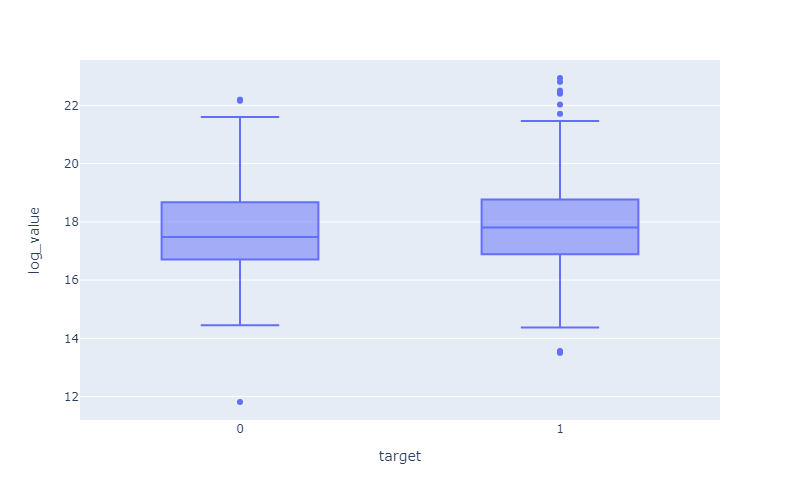

In [22]:
fig = px.box(data_frame=ipo, x='target', y='log_value', width=800, height=500)
fig.show(renderer='png')

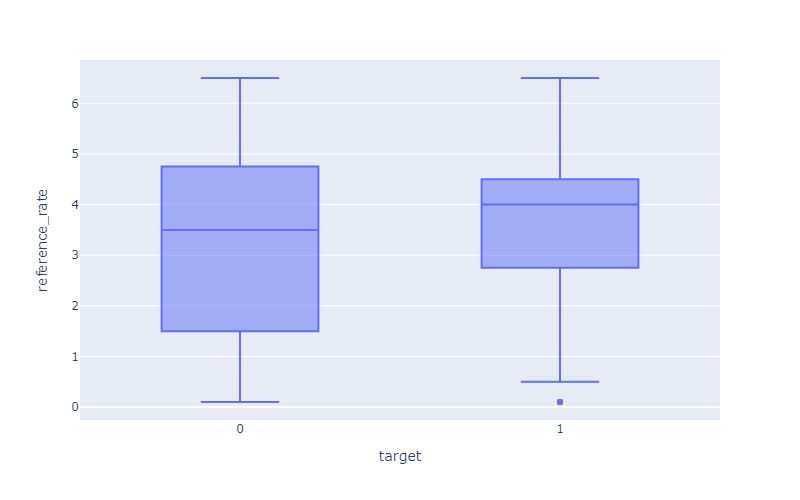

In [23]:
fig = px.box(data_frame=ipo, x='target', y='reference_rate', width=800, height=500)
fig.show(renderer='png')

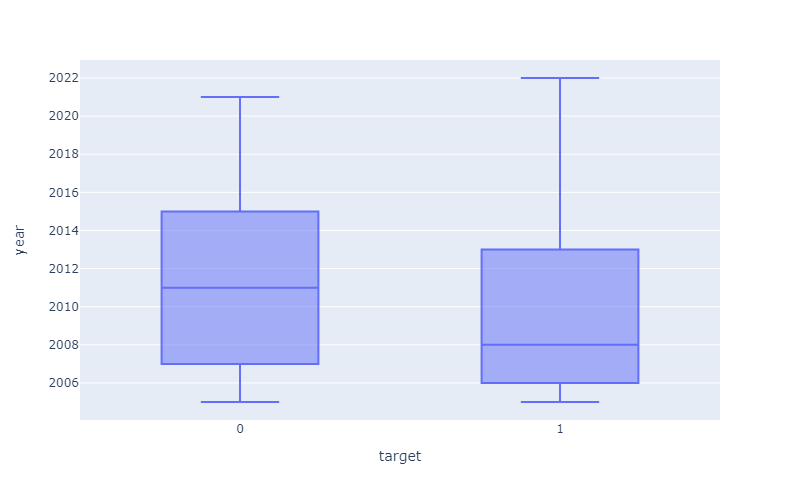

In [24]:
fig = px.box(data_frame=ipo, x='target', y='year', width=800, height=500)
fig.show(renderer='png')

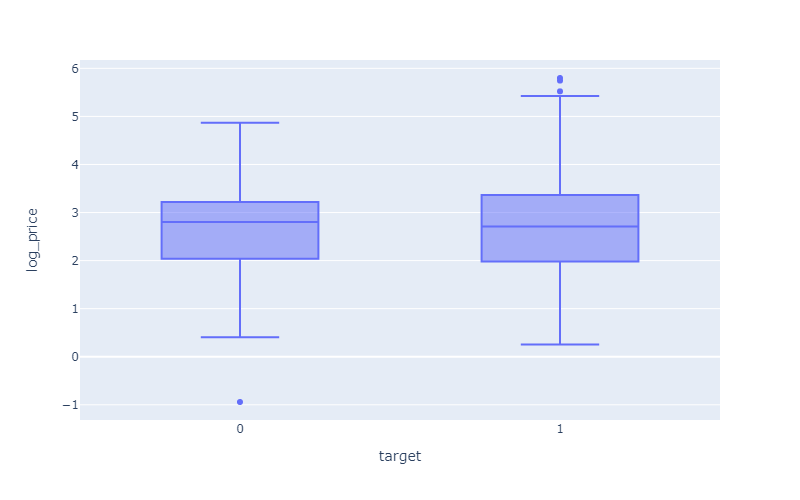

In [25]:
fig = px.box(data_frame=ipo, x='target', y='log_price', width=800, height=500)
fig.show(renderer='png')

In [26]:
# Check the outlier - its' legit
ipo[ipo['log_price'] < 0]

,company_name,is_offering_new_shares,is_offering_existing_shares,is_moving,is_privatized,is_foreign,retail_reduction_rate,sector,market_volatility,market_return,air,target,date_gap,reference_rate,year,log_value,log_price,const,target_lag1
listing_date,,,,,,,,,,,,,,,,,,,
2013-06-25,PLATINUM PROPERTIES GROUP,1,0,1,0,0,0.0,real_estate,1.35,-4.88,-30.62,0,73,2.75,2013,15.834334,-0.941609,1,1.0


Summary
* The obvious conclusion to be drawn from these tests is that the only continuous exogenous variables that are somehow connected with underpricing are: `retail_reduction_rate` and `market_return`.
* Let's take a deeper look into them. 

In [27]:
perform_stationarity_test(df=ipo, col_name='retail_reduction_rate')

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root (series is not stationary).
The alternative hypothesis is that there is no unit root.
p-value = P(reject H0|H0 true)
p-value for retail_reduction_rate is equal to 0.258.
p-value > 0.05, hence there is not enough evidence to reject H0 -> the process is not stationary!

The null hypothesis of the Kwiatkowski-Phillips-Schmidt-Shin is that the process is trend stationary.
The alternative hypothesis is that there is a unit root (series is not stationary).
p-value = P(reject H0|H0 true)
p-value for retail_reduction_rate is equal to 0.01.
p-value < 0.05, hence there is enough evidence to reject H0 -> the process is not stationary!


In [28]:
perform_autocorrelation_test(series=ipo['retail_reduction_rate'], order=10)

The null hypothesis of Ljung-Box test is that the autocorrelations of any order up to 10 are all zero.
p-value = P(reject H0|H0 true)
p-values of Ljung-Box test are: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p-values > 0.05, hence there is not enough evidence to reject H0 -> the series is uncorrelated at lags []
p-values < 0.05, hence there is enough evidence to reject H0 -> the series is autocorrelated at lags [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [29]:
perform_normality_test(df=ipo, col_name='retail_reduction_rate')

The null hypothesis of both Jarque-Bera and Shapiro-Wilk tests is that the sample was drawn from a normal distribution.
p-value = P(reject H0|H0 true)
p-value of Jarque-Bera test is equal to: 0.0
p-value of Shapiro-Wilk test is equal to: 0.0
both Jarque-Bera and Shapiro-Wilk p-values < 0.05, hence hence there is enough evidence to reject H0 -> the sample does not follow a normal distribution!


In [30]:
perform_stationarity_test(df=ipo, col_name='market_return')

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root (series is not stationary).
The alternative hypothesis is that there is no unit root.
p-value = P(reject H0|H0 true)
p-value for market_return is equal to 0.022.
p-value < 0.05, hence there is enough evidence to reject H0 -> thus the process is stationary!

The null hypothesis of the Kwiatkowski-Phillips-Schmidt-Shin is that the process is trend stationary.
The alternative hypothesis is that there is a unit root (series is not stationary).
p-value = P(reject H0|H0 true)
p-value for market_return is equal to 0.082.
p-value > 0.05, hence there is not enough evidence to reject H0 -> the process is stationary!


In [31]:
perform_autocorrelation_test(series=ipo['market_return'], order=10)

The null hypothesis of Ljung-Box test is that the autocorrelations of any order up to 10 are all zero.
p-value = P(reject H0|H0 true)
p-values of Ljung-Box test are: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p-values > 0.05, hence there is not enough evidence to reject H0 -> the series is uncorrelated at lags []
p-values < 0.05, hence there is enough evidence to reject H0 -> the series is autocorrelated at lags [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [32]:
perform_normality_test(df=ipo, col_name='market_return')

The null hypothesis of both Jarque-Bera and Shapiro-Wilk tests is that the sample was drawn from a normal distribution.
p-value = P(reject H0|H0 true)
p-value of Jarque-Bera test is equal to: 0.0
p-value of Shapiro-Wilk test is equal to: 0.0
both Jarque-Bera and Shapiro-Wilk p-values < 0.05, hence hence there is enough evidence to reject H0 -> the sample does not follow a normal distribution!


#### Categorical exogenous variables
Let's use chi-square test for independence to check if categorical endogenous and exogenous variables are likely to be related or not.

In [33]:
perform_chi_square_independence_test(ipo['target'], ipo['is_foreign'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.959
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


is_foreign,0,1
target,,
0,90,10
1,200,20


In [34]:
perform_chi_square_independence_test(ipo['target'], ipo['is_offering_new_shares'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.816
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


is_offering_new_shares,0,1
target,,
0,13,87
1,25,195


In [35]:
perform_chi_square_independence_test(ipo['target'], ipo['is_privatized'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.976
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


is_privatized,0,1
target,,
0,94,6
1,205,15


In [36]:
perform_chi_square_independence_test(ipo['target'], ipo['is_foreign'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.959
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


is_foreign,0,1
target,,
0,90,10
1,200,20


In [37]:
perform_chi_square_independence_test(ipo['target'], ipo['is_offering_existing_shares'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.045
p-value < 0.05, hence there is enough evidence to reject H0 -> series_2 is not independent of series_1!


is_offering_existing_shares,0,1
target,,
0,61,39
1,106,114


In [38]:
perform_chi_square_independence_test(ipo['target'], ipo['is_moving'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.005
p-value < 0.05, hence there is enough evidence to reject H0 -> series_2 is not independent of series_1!


is_moving,0,1
target,,
0,85,15
1,209,11


In [39]:
perform_chi_square_independence_test(ipo['target'], ipo['target_lag1'])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.003
p-value < 0.05, hence there is enough evidence to reject H0 -> series_2 is not independent of series_1!


target_lag1,0.0,1.0
target,,
0,43,57
1,57,163


In [40]:
ipo = pd.get_dummies(data=ipo, columns=['sector'])
for col in ipo.columns[ipo.columns.str.contains(pat='sector')]:
    perform_chi_square_independence_test(ipo['target'], ipo[col])

The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.234
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_finance,0,1
target,,
0,94,6
1,196,24


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.555
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_healthcare_industry,0,1
target,,
0,94,6
1,201,19


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 1.0
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_heavy_industry,0,1
target,,
0,77,23
1,168,52


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.73
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_information_technology,0,1
target,,
0,85,15
1,182,38


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.269
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_media,0,1
target,,
0,98,2
1,208,12


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.38
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_power,0,1
target,,
0,94,6
1,213,7


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.647
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_raw_materials,0,1
target,,
0,91,9
1,205,15


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 1.0
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_raw_materials,0,1
target,,
0,99,1
1,218,2


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.035
p-value < 0.05, hence there is enough evidence to reject H0 -> series_2 is not independent of series_1!


sector_real_estate,0,1
target,,
0,87,13
1,208,12


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 1.0
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_retail_and_consumer_industry,0,1
target,,
0,87,13
1,190,30


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 1.0
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_retail_trade,0,1
target,,
0,97,3
1,214,6


The null hypothesis of the chi-square test of independence is that the series_1 is independent of series_2.
p-value = P(reject H0|H0 true)
p-value of the chi-square test of independence is equal to: 0.578
p-value > 0.05, hence there is not enough evidence to reject H0 -> series_2 is independent of series_1!


sector_telecommunications,0,1
target,,
0,97,3
1,217,3


Summary
* The obvious conclusion to be drawn from these tests is that the only categorical exogenous variables that are somehow connected with underpricing are: `is_moving` `is_offering_existing_shares`, and `target_lag1`.